1. A neural network is a machine learning program that make decisions similar to neurons in the brain. They are made up of nodes that work together to improve datasets in accuracy as well as make decisions. The general steps include preprocessing the data. Then, train-test-splitting the data. This is followed by creating tensors from the data and building activation functions. Then, super is applied and activation functions are applied. Then, an instance is created followed by adding a loss funcition and the optimizer being used. Then, the model is run through various epochs/iterations. Then, predicitons are made with Confusion Matrix Display

2. To check the performance of a neural network, you would have to make predictions and then determine the precision, recall, f1-score, and support, as well as accuracy. This is used to make sure that you are getting accurate results and to avoid overfitting.

In [70]:
#3 
import pandas as pd
import numpy as np

In [71]:
heart_df = pd.read_csv('processed.switzerland.data')
heart_df.head()

,32,1,1.1,95,0,?,0.1,127,0.2,.7,1.2,?.1,?.2,1.3
0,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
1,35,1,4,?,0,?,0,130,1,?,?,?,7,3
2,36,1,4,110,0,?,0,125,1,1,2,?,6,1
3,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
4,38,0,4,110,0,0,0,156,0,0,2,?,3,1


In [72]:
heart_df.columns = heart_df.columns.str.replace('32','Age')
heart_df.columns = heart_df.columns.str.replace('1', 'Sex')
heart_df.columns = heart_df.columns.str.replace('.', ' ')
heart_df.columns = heart_df.columns.str.replace('Sex Sex', 'Chest_Pain_Type')
heart_df.columns = heart_df.columns.str.replace('95', 'RBP')
heart_df.columns = heart_df.columns.str.replace('0', 'Cholestoral')
heart_df.columns = heart_df.columns.str.replace('?', 'FBS')
heart_df.columns = heart_df.columns.str.replace('Cholestoral Sex', 'RECG')
heart_df.columns = heart_df.columns.str.replace('Sex27', 'MHR')
heart_df.columns = heart_df.columns.str.replace('Cholestoral 2', 'EIA')
heart_df.columns = heart_df.columns.str.replace('7', 'Old')
heart_df.columns = heart_df.columns.str.replace('Sex 2', 'Slope')
heart_df.columns = heart_df.columns.str.replace('FBS Sex', 'Vessels')
heart_df.columns = heart_df.columns.str.replace('FBS 2', 'THAL')
heart_df.columns = heart_df.columns.str.replace('Sex 3', 'Outcome')

/tmp/ipykernel_1440/3711648416.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart_df.columns = heart_df.columns.str.replace('.', ' ')
/tmp/ipykernel_1440/3711648416.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart_df.columns = heart_df.columns.str.replace('?', 'FBS')


In [73]:
heart_df.replace('?', '00', inplace=True)
heart_df.head()

,Age,Sex,Chest_Pain_Type,RBP,Cholestoral,FBS,RECG,MHR,EIA,Old,Slope,Vessels,THAL,Outcome
0,34,1,4,115,0,00,00,154,0,.2,1,00,00,1
1,35,1,4,00,0,00,0,130,1,00,00,00,7,3
2,36,1,4,110,0,00,0,125,1,1,2,00,6,1
3,38,0,4,105,0,00,0,166,0,2.8,1,00,00,2
4,38,0,4,110,0,0,0,156,0,0,2,00,3,1


In [74]:
# I took out all the null and NaN values from the dataset which I didn't do before.
# I also kept the cholestoral column instead of dropping it.
heart_df = heart_df.dropna()
print(heart_df)

     Age  Sex  Chest_Pain_Type  RBP  Cholestoral FBS RECG  MHR EIA  Old Slope  \
0     34    1                4  115            0  00   00  154   0   .2     1   
1     35    1                4   00            0  00    0  130   1   00    00   
2     36    1                4  110            0  00    0  125   1    1     2   
3     38    0                4  105            0  00    0  166   0  2.8     1   
4     38    0                4  110            0   0    0  156   0    0     2   
..   ...  ...              ...  ...          ...  ..  ...  ...  ..  ...   ...   
117   70    1                4  115            0   0    1   92   1    0     2   
118   70    1                4  140            0   1    0  157   1    2     2   
119   72    1                3  160            0  00    2  114   0  1.6     2   
120   73    0                3  160            0   0    1  121   0    0     1   
121   74    1                2  145            0  00    1  123   0  1.3     1   

    Vessels THAL  Outcome  

In [75]:
nan_count = heart_df.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 0


In [76]:
null_count = heart_df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 0


In [77]:
# I also did one-hot encoding on the data which I didn't do before
heart_dfresults = pd.get_dummies(heart_df['Sex'])
heart_dfresults

,0,1
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
117,0,1
118,0,1
119,0,1
120,1,0


In [78]:
heart_df.dtypes

Age                 int64
Sex                 int64
Chest_Pain_Type     int64
RBP                object
Cholestoral         int64
FBS                object
RECG               object
MHR                object
EIA                object
 Old               object
Slope              object
Vessels            object
THAL               object
Outcome             int64
dtype: object

In [162]:
#4
from sklearn.model_selection import train_test_split

X = np.array(heart_df['Chest_Pain_Type']).reshape(-1,1)
y = np.array(heart_df['Outcome']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=32)

In [163]:
import torch.nn as nn
import torch.nn.functional as F
import torch

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.FloatTensor(y_test)
y_train = torch.FloatTensor(y_train)

print(X_train)

tensor([[4.],
        [4.],
        [4.],
        [2.],
        [4.],
        [4.],
        [2.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [3.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [3.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [3.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [3.],
        [4.],
        [4.],
        [4.],
        [4.],
        [1.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [4.],
        [2.],
        [4.],
        [4.],
        [3.],
        [3.],
        [4.],
        [4.],
        [4.],
        [4.],
        [1.],
        [4.],
        [4.],
      

In [164]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=1,hidden1=20,hidden2=20,out_features=1):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features,hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [165]:
torch.manual_seed(32)
ann = ANN_Model()

In [166]:
# I used RMSprop instead of Adam as my optimizer for this dataset.

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(ann.parameters(), lr=0.01)

In [167]:
final_loss=[]
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 with loss: -0.0
Epoch number: 11 with loss: -0.0
Epoch number: 21 with loss: -0.0
Epoch number: 31 with loss: -0.0
Epoch number: 41 with loss: -0.0
Epoch number: 51 with loss: -0.0
Epoch number: 61 with loss: -0.0
Epoch number: 71 with loss: -0.0
Epoch number: 81 with loss: -0.0
Epoch number: 91 with loss: -0.0
Epoch number: 101 with loss: -0.0
Epoch number: 111 with loss: -0.0
Epoch number: 121 with loss: -0.0
Epoch number: 131 with loss: -0.0
Epoch number: 141 with loss: -0.0
Epoch number: 151 with loss: -0.0
Epoch number: 161 with loss: -0.0
Epoch number: 171 with loss: -0.0
Epoch number: 181 with loss: -0.0
Epoch number: 191 with loss: -0.0
Epoch number: 201 with loss: -0.0
Epoch number: 211 with loss: -0.0
Epoch number: 221 with loss: -0.0
Epoch number: 231 with loss: -0.0
Epoch number: 241 with loss: -0.0
Epoch number: 251 with loss: -0.0
Epoch number: 261 with loss: -0.0
Epoch number: 271 with loss: -0.0
Epoch number: 281 with loss: -0.0
Epoch number: 291 with lo

In [168]:
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.11      1.00      0.20         4
         1.0       0.00      0.00      0.00        14
         2.0       0.00      0.00      0.00         9
         3.0       0.00      0.00      0.00        10

    accuracy                           0.11        37
   macro avg       0.03      0.25      0.05        37
weighted avg       0.01      0.11      0.02        37



ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (41).

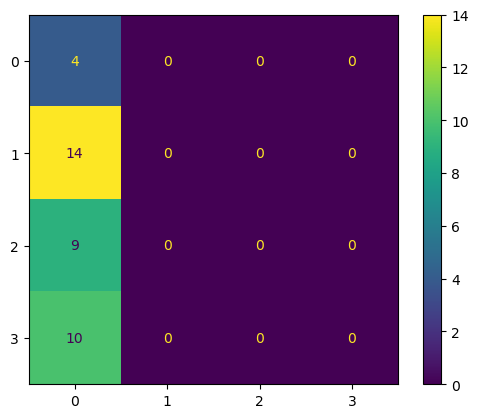

In [169]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

I compared this model to Quiz 12 diabetes dataset. The diabetes dataset performed better than this one. The reason could be the number of variables in this dataset compared to that one. The diabetes dataset is a binary dataset while this one has multiple varibles which could have affected the model and the way it performed.